# LDA of Speeches

In [416]:
from __future__ import print_function
from time import time

# import sklearn

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

n_samples = 2000
n_features = 1000
n_topics = 20
n_top_words = 20

In [417]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()


# Load the 20 newsgroups dataset and vectorize it. We use a few heuristics
# to filter out useless terms early on: the posts are stripped of headers,
# footers and quoted replies, and common English words, words occurring in
# only one document or in at least 95% of the documents are removed.

In [439]:
print("Loading dataset...")
t0 = time()
dat=pd.read_csv("../notebooks/datasets/speeches/2016.csv_all.csv")
print("done in %0.3fs." % (time() - t0))

Loading dataset...
done in 0.154s.


In [440]:
dat=dat.dropna()

In [441]:
data_samples = list(dat['Texts'].values)

In [442]:
# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, #max_features=n_features,
                                   stop_words='english', strip_accents='ascii', encoding='utf-8', decode_error='ignore')
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

Extracting tf-idf features for NMF...
done in 2.251s.


In [443]:
# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=n_features,
                                stop_words='english')
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

Extracting tf features for LDA...
done in 2.062s.


In [444]:
# # Fit the NMF model
# print("Fitting the NMF model with tf-idf features,"
#       "n_samples=%d and n_features=%d..."
#       % (n_samples, n_features))
# t0 = time()
# nmf = NMF(n_components=n_topics, random_state=1, alpha=.1, l1_ratio=.5).fit(tfidf)
# exit()
# print("done in %0.3fs." % (time() - t0))

In [445]:
# print("\nTopics in NMF model:")
# tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [446]:
# print_top_words(nmf, tfidf_feature_names, n_top_words)

In [447]:
print("Fitting LDA models with tf features, n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
lda = LatentDirichletAllocation(n_topics=n_topics, max_iter=5,
                                learning_method='online', learning_offset=50.,
                                random_state=0)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Fitting LDA models with tf features, n_samples=2000 and n_features=1000...
done in 20.575s.

Topics in LDA model:
Topic #0:
economy american new jobs tax america century economic people growth government president need washington like taxes americans just businesses make
Topic #1:
graham president lindsey obama security military isis foreign world policy america syria american national war iraq radical united states commander
Topic #2:
gun planned parenthood life abortion violence act rights president obama women health pro law right care control human amendment legislation
Topic #3:
going think know people said don want ve just say really like lot got clinton did good right look way
Topic #4:
iowa 2015 2016 com twitter pic des moines ia virginia february event georgia walker marcorubio scott january webb caucus crowd
Topic #5:
carolina south pastor church faith baptist dr life liberty religious christian president north family charleston god texas said women leaders
Topic #6:
presiden

#How often candidates have speeches

In [ ]:
print("Loading dataset...")
t0 = time()
dat_s=pd.read_csv("../notebooks/datasets/speeches/2016.csv")
dat_s['Date']=pd.to_datetime(dat_s['Date'],infer_datetime_format=True)
dat_s['Counter']=1
dat_s.index=dat_s['Date']
del dat_s['Date']
print("done in %0.3fs." % (time() - t0))

In [448]:
#5000 -speech
#1 - statements
#2 - press release
dat

,Unnamed: 0,url,Date,Title,Link,Actor,Texts
0,0,http://www.presidency.ucsb.edu/2016_election_s...,"April 12, 2015",Video Remarks Announcing Candidacy for President,http://www.presidency.ucsb.edu/ws/index.php?pi...,Hillary Clinton,Unidentified Female: I'm getting ready for a l...
1,1,http://www.presidency.ucsb.edu/2016_election_s...,"April 14, 2015",Remarks in a Question and Answer Session at Ki...,http://www.presidency.ucsb.edu/ws/index.php?pi...,Hillary Clinton,[joined in progress]\n[unknown student speaker...
2,2,http://www.presidency.ucsb.edu/2016_election_s...,"April 20, 2015","Remarks in Keene, New Hampshire",http://www.presidency.ucsb.edu/ws/index.php?pi...,Hillary Clinton,"Clinton: Well, thank you all so much for invit..."
3,3,http://www.presidency.ucsb.edu/2016_election_s...,"April 29, 2015",Address to the David N. Dinkins Leadership & P...,http://www.presidency.ucsb.edu/ws/index.php?pi...,Hillary Clinton,Thank you so much. I am absolutely delighted t...
4,4,http://www.presidency.ucsb.edu/2016_election_s...,"May 5, 2015",Remarks at a Roundtable with Young Nevada Resi...,http://www.presidency.ucsb.edu/ws/index.php?pi...,Hillary Clinton,"CLINTON: Oh, hello. Hi, how are you? Well, it'..."
5,5,http://www.presidency.ucsb.edu/2016_election_s...,"May 18, 2015","Remarks at a Campaign Event in Mason City, Iowa",http://www.presidency.ucsb.edu/ws/index.php?pi...,Hillary Clinton,CLINTON: Thank you. Wow. Thank you. I am thril...
6,6,http://www.presidency.ucsb.edu/2016_election_s...,"May 19, 2015","Remarks in Cedar Falls, Iowa",http://www.presidency.ucsb.edu/ws/index.php?pi...,Hillary Clinton,Well first let me thank all of you in particul...
7,7,http://www.presidency.ucsb.edu/2016_election_s...,"May 20, 2015","Remarks in Chicago, Illinois",http://www.presidency.ucsb.edu/ws/index.php?pi...,Hillary Clinton,"Wow, what a great way to begin and to all of y..."
8,8,http://www.presidency.ucsb.edu/2016_election_s...,"May 27, 2015",Remarks to the Democratic Women's Council in C...,http://www.presidency.ucsb.edu/ws/index.php?pi...,Hillary Clinton,"Well, this is so exciting, to be here with all..."
9,9,http://www.presidency.ucsb.edu/2016_election_s...,"June 4, 2015",Remarks at Texas Southern University in Houston,http://www.presidency.ucsb.edu/ws/index.php?pi...,Hillary Clinton,Wow! Thank you so very much. I cannot tell you...


In [358]:
ts = pd.DataFrame(columns=['Date'], data=pd.date_range(start=dat_s.index.min(), end=dat_s.index.max()), index=pd.date_range(start=dat_s.index.min(), end=dat_s.index.max()))
dat_s=ts.join(dat_s).fillna(0)
dat_s=dat_s.groupby([dat_s.index, dat_s['Date'], dat_s['Actor']], as_index=False).sum()
dat_s=dat_s.pivot(index='Date', columns='Actor', values='Counter')
dat_s=dat_s.fillna(0)
del dat_s[0]
dat_s=dat_s.cumsum()

In [364]:
import plotly.plotly as py
import plotly.graph_objs as go

py.sign_in('kajdanowicz', '24enakh1z2')

# Create traces
traces=[]

for column in dat_s.columns:
    traces.append(
        go.Scatter(
            x = dat_s.index,
            y = dat_s[column],
            mode = 'lines',
            name = column
        )
    )

# data = [trace0, trace1, trace2]

In [365]:
py.iplot(traces, filename='scatter-mode')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~kajdanowicz/0 or inside your plot.ly account where it is named 'scatter-mode'


/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:122: InsecurePlatformWarning:

A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.



#Sentiment calculation of the speeches

In [394]:
import pandas as pd
import numpy as np
import json
from polyglot.text import Text
from polyglot.downloader import downloader
from textblob import TextBlob
import nltk
import timestring
from datetime import datetime

In [395]:
def get_entity_sentiment(e):
    try:
        pos=e.positive_sentiment
        neg=e.negative_sentiment
        return pos,neg
    except:
        return '',''
def get_sentiment(t):
    blob = TextBlob(str(t).decode('utf-8'))
    return map(lambda s:s.sentiment.polarity,blob.sentences)
def get_noun_phrases(t):
    blob = TextBlob(t.decode('utf-8'))
    return list(blob.noun_phrases)
def map_entity(e):
    pos,neg=get_entity_sentiment(e)
    return {'tag':e.tag,'entity':" ".join(e),'pos':pos,'neg':neg}
def get_entites(text):
    try:
        polyglot_text=Text(text)
        entities=polyglot_text.entities
        return map(map_entity,entities)
    except:
        return []
     
def map_to_data(tweet):
    user_name=tweet['user']['name']
    text=tweet['text']
    return {'text':text,'user':user_name,'entities':get_entites(text),'sentiment':get_sentiment(text),'noun_phrases':get_noun_phrases(text)}

In [396]:
print("Loading dataset...")
t0 = time()
dat=pd.read_csv("../notebooks/datasets/speeches/2016.csv_all.csv")
dat['Date']=pd.to_datetime(dat['Date'],infer_datetime_format=True)
dat.index=dat['Date']
del dat['Date']
print("done in %0.3fs." % (time() - t0))

Loading dataset...
done in 0.193s.


In [397]:
dat['sentiment']=dat['Texts'].map(get_sentiment)

In [398]:
dat['mean_sentiment']=dat['sentiment'].map(lambda s:reduce(lambda x, y: x + y, s) / len(s))

In [399]:
ts = pd.DataFrame(columns=['Date'], data=pd.date_range(start=dat.index.min(), end=dat.index.max()), index=pd.date_range(start=dat.index.min(), end=dat.index.max()))
dat=ts.join(dat).fillna(0)
dat=dat.groupby([dat.index, dat['Date'], dat['Actor']], as_index=False).sum()
dat=dat.pivot(index='Date', columns='Actor', values='mean_sentiment')
# dat=dat.fillna(0)
del dat[0]

In [379]:
dat

Actor,Ben Carson,Bernie Sanders,Bobby Jindal,Carly Fiorina,Chris Christie,Donald Trump,George Pataki,Hillary Clinton,Jeb Bush,Jim Webb,...,Lincoln Chafee,Lindsey Graham,Marco Rubio,Martin O'Malley,Mike Huckabee,Rand Paul,Rick Perry,Rick Santorum,Scott Walker,Ted Cruz
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-23,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.137793
2015-03-24,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.198769
2015-03-25,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.126987
2015-03-26,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
2015-03-27,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
2015-03-28,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.182428
2015-03-29,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.129390
2015-03-30,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.072751
2015-03-31,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000


In [384]:
dat.columns

Index([u'Ben Carson', u'Bernie Sanders', u'Bobby Jindal', u'Carly Fiorina',
       u'Chris Christie', u'Donald Trump', u'George Pataki',
       u'Hillary Clinton', u'Jeb Bush', u'Jim Webb', u'John Kasich',
       u'Lincoln Chafee', u'Lindsey Graham', u'Marco Rubio',
       u'Martin O'Malley', u'Mike Huckabee', u'Rand Paul', u'Rick Perry',
       u'Rick Santorum', u'Scott Walker', u'Ted Cruz'],
      dtype='object', name=u'Actor')

In [400]:
import plotly.plotly as py
import plotly.graph_objs as go

py.sign_in('kajdanowicz', '24enakh1z2')

# Create traces
traces=[]

for column in dat.columns:
    if(column in ['Bernie Sanders', 'Donald Trump', 'Hillary Clinton']):
        traces.append(
            go.Scatter(
                x = dat.index,
                y = dat[column],
                mode = 'lines',
                name = column
            )
    )

# data = [trace0, trace1, trace2]

In [401]:
py.iplot(traces, filename='scatter-mode')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~kajdanowicz/0 or inside your plot.ly account where it is named 'scatter-mode'


/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:122: InsecurePlatformWarning:

A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.



In [413]:
dat2=dat

In [449]:
dat2=dat2.rolling(window=3, win_type='triang', min_periods=1).mean()

In [450]:
traces2=[]

for column in dat2.columns:
    if(column in ['Bernie Sanders', 'Donald Trump', 'Hillary Clinton']):
        traces2.append(
            go.Scatter(
                x = dat2.index,
                y = dat2[column],
                mode = 'lines',
                name = column
            )
    )
py.iplot(traces2, filename='scatter-mode')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~kajdanowicz/0 or inside your plot.ly account where it is named 'scatter-mode'


/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:122: InsecurePlatformWarning:

A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.



#Meaningcloud sentiment annotation with aspects

In [617]:
import ast
from collections import Counter

In [644]:
#preprocessing
dat_ont=pd.read_pickle('/notebooks/datasets/speeches/2016_with_ontology_2.pkl')
dat_ont['entities']=dat_ont['entities'].map(ast.literal_eval)

###making the ongological categories pretty formated

In [645]:
def get_category(ontology):
    cats=[]
    if('category_list' in ontology):
        for category in ontology['category_list']:
            cats.append(category['label'])
    return cats

In [646]:
dat_ont['categories']=dat_ont['ontology'].map(get_category)

###making the aspect sentiment preetty formatted

### fiding how many times is self-poiting and its sentiment 

#Categories of text in time

In [647]:
distinct_categories=set([j for i in dat_ont['categories'].values for j in i])

In [648]:
#how many occurances of categories per author
actor_topics=dat_ont.groupby('Actor')['categories'].apply(list)

In [649]:
actor_topics['Bernie Sanders']=[j for i in actor_topics['Bernie Sanders'] for j in i]
actor_topics['Donald Trump']=[j for i in actor_topics['Donald Trump'] for j in i]
actor_topics['Hillary Clinton']=[j for i in actor_topics['Hillary Clinton'] for j in i]

In [653]:
a=actor_topics.map(Counter)

In [673]:
# [(k, v) for k, v in a[0].iteritems()]

In [684]:
a

Actor
Bernie Sanders     {u'economy, business and finance - transport -...
Donald Trump       {u'disaster and accident - transport accident ...
Hillary Clinton    {u'arts, culture and entertainment - music - p...
Name: categories, dtype: object

In [662]:
for cand in a.iteritems():
    print cand

SyntaxError: invalid syntax (<ipython-input-662-b2510867993d>, line 2)

In [656]:
from wordcloud import WordCloud

In [728]:
print(len([(k, v) for k, v in a[0].iteritems()]))
print(len([(k, v) for k, v in a[1].iteritems()]))
print(len([(k, v) for k, v in a[2].iteritems()]))

166
66
115


In [702]:
a['Donald Trump']

Counter({u'politics - election': 63, u'social issue - people': 14, u'politics - parties and movements': 13, u'politics - parliament': 12, u'economy, business and finance': 12, u'social issue - demographics - illegal immigrants': 10, u'politics - politics (general)': 10, u'economy, business and finance - economy (general)': 8, u'politics - election - political campaigns': 8, u'sport - motor rallying': 7, u'crime, law and justice - judiciary (system of justice)': 6, u'politics - election - poll': 5, u'social issue - family': 5, u'politics - local authority': 4, u'politics - election - campaign finance': 4, u'human interest - people - celebrity': 4, u'economy, business and finance - construction and property': 4, u'human interest - award and prize': 3, u'politics - migration': 3, u'politics - defence - veterans affairs': 3, u'politics - diplomacy - summit': 3, u'politics - election - voting': 3, u'politics - defence': 3, u'unrest, conflicts and war': 2, u'education - school': 2, u'social 

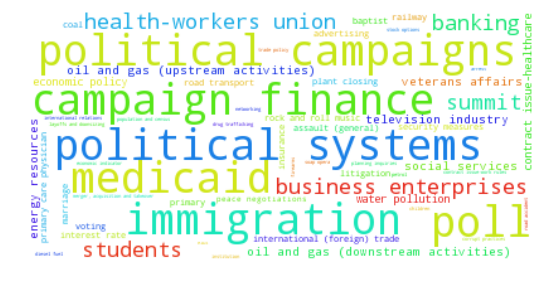

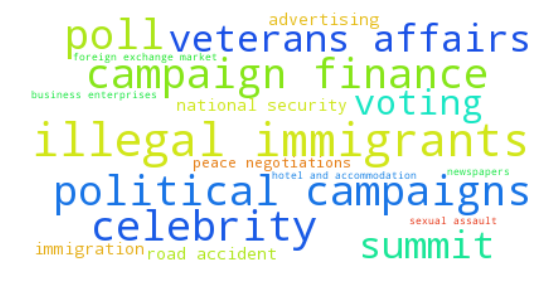

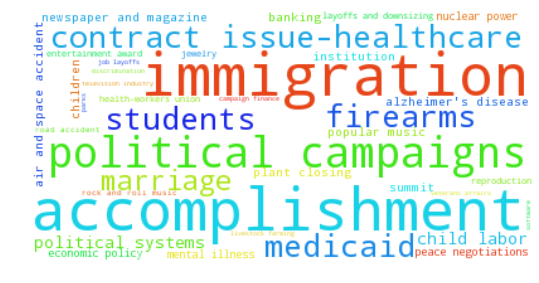

In [725]:
for cand in a:
#     print(cand)
    wordcloud = WordCloud(background_color="white").generate_from_frequencies(
        [(' '.join(k.split(' - ')[2:]), v) for k, v in cand.iteritems()])
    plt.figure(figsize=(9, 12))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

#Standard features for candidates

In [707]:
d=pd.read_csv('/notebooks/datasets/generic/comp.csv')

In [708]:
d

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60
0,CLINTON,1,-1,1,0,-1,1,-1,-1,-1,...,1,1,1,1,1,-1,1,1,-1,1
1,SANDERS,-1,-1,1,-1,-1,1,-1,1,-1,...,1,1,1,1,1,-1,1,1,-1,1
2,TRUMP,1,1,-1,0,-1,-1,0,0,0,...,1,0,0,-1,-1,1,-1,0,0,0


In [ ]:
print(__doc__)
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA

n_samples = 20
seed = np.random.RandomState(seed=3)
X_true = seed.randint(0, 20, 2 * n_samples).astype(np.float)
X_true = X_true.reshape((n_samples, 2))
# Center the data
X_true -= X_true.mean()

similarities = euclidean_distances(X_true)

# # Add noise to the similarities
# noise = np.random.rand(n_samples, n_samples)
# noise = noise + noise.T
# noise[np.arange(noise.shape[0]), np.arange(noise.shape[0])] = 0

In [ ]:
del d['Unnamed: 0']

In [720]:
d.values

array([[ 1, -1,  1,  0, -1,  1, -1, -1, -1, -1,  0,  0,  1, -1,  1, -1,  1,
         1,  1, -1,  1,  1,  1,  1,  0, -1,  1,  1, -1,  1,  1,  1, -1,  0,
         0,  1,  0,  1,  1,  1,  1,  1,  0,  1,  1,  1,  0, -1, -1,  1,  1,
         1,  1,  1,  1, -1,  1,  1, -1,  1],
       [-1, -1,  1, -1, -1,  1, -1,  1, -1, -1,  0,  1,  1, -1,  1, -1,  1,
        -1,  0, -1,  1,  1,  1,  0,  1, -1,  1,  1, -1,  1,  1,  1, -1,  0,
        -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1,  0,  1,
         1,  1,  1,  1, -1,  1,  1, -1,  1],
       [ 1,  1, -1,  0, -1, -1,  0,  0,  0, -1,  1, -1, -1, -1,  0,  0,  0,
         1,  1, -1, -1,  0, -1,  0,  0, -1, -1, -1,  0,  0, -1,  0,  1,  1,
         1, -1,  0, -1,  0,  1,  0,  1,  0,  0,  1, -1, -1,  1,  1,  0,  1,
         0,  0, -1, -1,  1, -1,  0,  0,  0]])

In [735]:
print(__doc__)
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA


n_samples = 20
seed = np.random.RandomState(seed=3)
X_true = seed.randint(0, 20, 2 * n_samples).astype(np.float)
X_true = X_true.reshape((n_samples, 2))
# Center the data
X_true -= X_true.mean()

similarities = euclidean_distances(d.values)

# # Add noise to the similarities
# noise = np.random.rand(n_samples, n_samples)
# noise = noise + noise.T
# noise[np.arange(noise.shape[0]), np.arange(noise.shape[0])] = 0
# similarities += noise

Automatically created module for IPython interactive environment


ImportError: cannot import name manhattan_distances

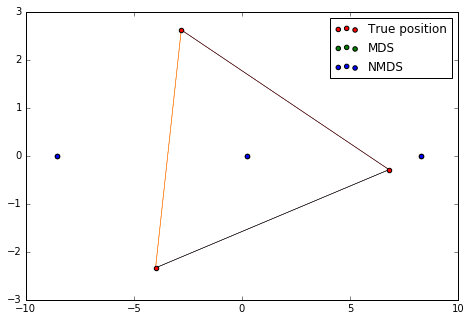

In [724]:
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(similarities).embedding_

nmds = manifold.MDS(n_components=2, metric=False, max_iter=3000, eps=1e-12,
                    dissimilarity="precomputed", random_state=seed, n_jobs=1,
                    n_init=1)
npos = nmds.fit_transform(similarities, init=pos)

# Rescale the data
pos *= np.sqrt((d.values ** 2).sum()) / np.sqrt((pos ** 2).sum())
npos *= np.sqrt((d.values ** 2).sum()) / np.sqrt((npos ** 2).sum())

# Rotate the data
clf = PCA(n_components=2)
X_true = clf.fit_transform(d.values)

pos = clf.fit_transform(pos)

npos = clf.fit_transform(npos)

fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])

plt.scatter(X_true[:, 0], X_true[:, 1], c='r', s=20)
plt.scatter(pos[:, 0], pos[:, 1], s=20, c='g')
plt.scatter(npos[:, 0], npos[:, 1], s=20, c='b')
plt.legend(('True position', 'MDS', 'NMDS'), loc='best')

similarities = similarities.max() / similarities * 100
similarities[np.isinf(similarities)] = 0

# Plot the edges
start_idx, end_idx = np.where(pos)
#a sequence of (*line0*, *line1*, *line2*), where::
#            linen = (x0, y0), (x1, y1), ... (xm, ym)
segments = [[X_true[i, :], X_true[j, :]]
            for i in range(len(pos)) for j in range(len(pos))]
values = np.abs(similarities)
lc = LineCollection(segments,
                    zorder=0, cmap=plt.cm.hot_r,
                    norm=plt.Normalize(0, values.max()))
lc.set_array(similarities.flatten())
lc.set_linewidths(0.5 * np.ones(len(segments)))
ax.add_collection(lc)

plt.show()

In [736]:
from sklearn.metrics.pairwise import manhattan_distances
manhattan_distances(d.values)

array([[  0.,  18.,  63.],
       [ 18.,   0.,  73.],
       [ 63.,  73.,   0.]])